## Note

directly.csv, using_proxy.csv は下記のコマンドを実行して生成した．

upstream (localhost:13901) は nginx の docker containerである．
proxy (localhost:8000) はこのCargo projectのバイナリである (`cargo r -r`を実行するだけ)．

また，コミットハッシュは `ca496dae24ab9f9d66fb9831741880587ca37d4a` である．


```shell
ntimes 1000 -- curl localhost:13901 -s -o /dev/null -w '%{time_total}\n' > directly.csv
ntimes 1000 -- curl localhost:8000 -s -o /dev/null -w '%{time_total}\n' > using_proxy.csv
```

In [1]:
with open("directly.csv") as f:
    display(sum(map(float, f)))


0.6874039999999995

In [2]:
with open("using_proxy.csv") as f:
    display(sum(map(float, f)))


0.8181879999999983

/tmp/ipykernel_706851/3728839262.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['direct', 'proxy'], fontdict={"fontsize": 14})


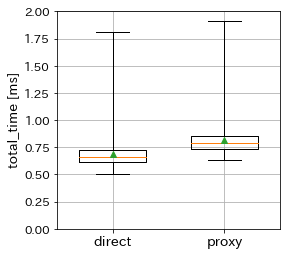

In [3]:
from matplotlib import pyplot as plt
import japanize_matplotlib

cmp = []
with open("directly.csv") as f:
    cmp.append(list(map(lambda x: x * 1000, map(float, f))))
with open("using_proxy.csv") as f:
    cmp.append(list(map(lambda x: x * 1000, map(float, f))))

fig, ax = plt.subplots()
ax.grid(True)
ax.tick_params("both", labelsize=12)
ax.set_ylabel("total_time [ms]", fontdict={"fontsize": 14})
ax.set_xticklabels(['direct', 'proxy'], fontdict={"fontsize": 14})
ax.set_ylim(0, 2)
ax.boxplot(cmp, showmeans=True, whis=(0, 100), widths=(0.6, 0.6))
fig.set_size_inches(4, 4)
fig.show()
fig.savefig("compare-proxy-and-direct.pdf", bbox_inches="tight", pad_inches=0)
fig.savefig("compare-proxy-and-direct.png", bbox_inches="tight", pad_inches=0)
